In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import seaborn as sns

In [66]:
df=pd.read_csv('Car_Price_Data.csv')


In [68]:
df

,Manufacturer,Year,Fuel_Type,Transmission,Mileage_km_per_litre,Engine_CC,Horsepower,Seats,Owner_Type,Price_lakhs
0,Ford,2008,Electric,Manual,15.73,3351,170,7,Third,99.03
1,Audi,2019,Diesel,Manual,18.67,2821,179,5,First,68.25
2,Honda,2016,Diesel,Manual,17.93,1746,251,7,First,45.70
3,Audi,2016,Electric,Automatic,23.32,3421,382,7,Second,65.46
4,Audi,2019,CNG,Automatic,8.77,2264,70,2,First,60.25
...,...,...,...,...,...,...,...,...,...,...
195,Honda,2013,CNG,Manual,14.76,3900,361,2,Second,88.60
196,BMW,2011,Electric,Manual,24.48,3626,351,4,Second,45.32
197,Ford,2018,Diesel,Manual,22.71,2230,98,4,Third,34.43
198,Honda,2022,Petrol,Automatic,21.89,2592,218,2,Second,45.98


In [69]:
df.shape

(200, 10)

<Axes: >

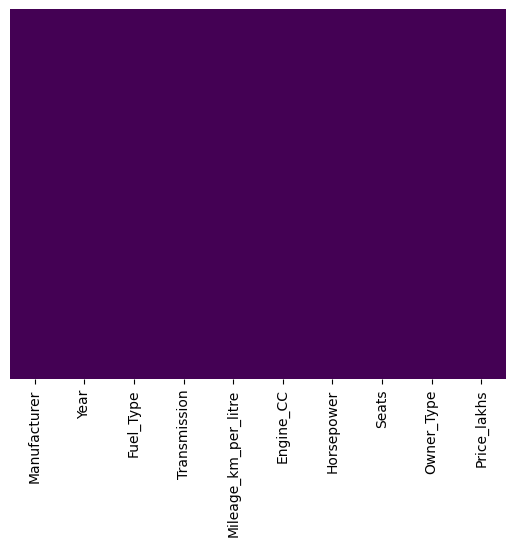

In [73]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

CATEGORICAL DATA NEEDS TO CONVERTED INTO NUMERICAL

In [74]:
df['Manufacturer'].value_counts()


Manufacturer
Ford        42
Toyota      33
Audi        32
Honda       32
Mercedes    32
BMW         29
Name: count, dtype: int64

In [75]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel      58
Electric    52
Petrol      50
CNG         40
Name: count, dtype: int64

In [76]:
df['Transmission'].value_counts()

Transmission
Manual       115
Automatic     85
Name: count, dtype: int64

In [77]:
df['Seats'].value_counts()


Seats
5    58
2    51
4    48
7    43
Name: count, dtype: int64

In [78]:
df['Owner_Type'].value_counts()

Owner_Type
First     75
Second    66
Third     59
Name: count, dtype: int64

In [80]:
df.isnull().sum()

Manufacturer            0
Year                    0
Fuel_Type               0
Transmission            0
Mileage_km_per_litre    0
Engine_CC               0
Horsepower              0
Seats                   0
Owner_Type              0
Price_lakhs             0
dtype: int64

In [81]:
Manufacturer=pd.get_dummies(df['Manufacturer'],drop_first=True)

In [82]:
Manufacturer


,BMW,Ford,Honda,Mercedes,Toyota
0,False,True,False,False,False
1,False,False,False,False,False
2,False,False,True,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,True,False,False
196,True,False,False,False,False
197,False,True,False,False,False
198,False,False,True,False,False


In [83]:
Fuel_Type=pd.get_dummies(df['Fuel_Type'],drop_first=True)
Fuel_Type

,Diesel,Electric,Petrol
0,False,True,False
1,True,False,False
2,True,False,False
3,False,True,False
4,False,False,False
...,...,...,...
195,False,False,False
196,False,True,False
197,True,False,False
198,False,False,True


In [84]:
Transmission=pd.get_dummies(df['Transmission'],drop_first=True)
Transmission

,Manual
0,True
1,True
2,True
3,False
4,False
...,...
195,True
196,True
197,True
198,False


In [85]:
Seats=pd.get_dummies(df['Seats'],drop_first=True)
Seats

,4,5,7
0,False,False,True
1,False,True,False
2,False,False,True
3,False,False,True
4,False,False,False
...,...,...,...
195,False,False,False
196,True,False,False
197,True,False,False
198,False,False,False


In [86]:
df['Model'] = df['Model'].replace(
    df['Model'].value_counts()[df['Model'].value_counts() < 0].index, 
    'Other'
)

,Second,Third
0,False,True
1,False,False
2,False,False
3,True,False
4,False,False
...,...,...
195,True,False
196,True,False
197,False,True
198,True,False


In [96]:
df.drop(['Owner_Type','Seats','Transmission','Fuel_Type','Manufacturer'],axis=1,inplace=True)

In [97]:
data=pd.concat([df,Manufacturer,Fuel_Type,Transmission,Seats,Owner_Type],axis=1)


In [99]:
data.head()

,Year,Mileage_km_per_litre,Engine_CC,Horsepower,Price_lakhs,BMW,Ford,Honda,Mercedes,Toyota,Diesel,Electric,Petrol,Manual,4,5,7,Second,Third
0,2008,15.73,3351,170,99.03,False,True,False,False,False,False,True,False,True,False,False,True,False,True
1,2019,18.67,2821,179,68.25,False,False,False,False,False,True,False,False,True,False,True,False,False,False
2,2016,17.93,1746,251,45.70,False,False,True,False,False,True,False,False,True,False,False,True,False,False
3,2016,23.32,3421,382,65.46,False,False,False,False,False,False,True,False,False,False,False,True,True,False
4,2019,8.77,2264,70,60.25,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [100]:
X=df.drop('Price_lakhs',axis=1)
y=df['Price_lakhs']

In [101]:
y.head()

0    99.03
1    68.25
2    45.70
3    65.46
4    60.25
Name: Price_lakhs, dtype: float64

In [102]:
#Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [103]:
model=LinearRegression()

In [104]:
model.fit(X_train,y_train)

LinearRegression()

In [106]:
y_pred=model.predict(X_test)

In [107]:
print(y_pred)

[56.52242326 49.01215068 54.17951597 42.54770495 46.27106335 49.00392515
 54.89543612 50.01063983 46.64909139 45.9793781  48.99414643 47.41546379
 52.64524788 53.23930413 46.8670009  54.1878706  52.85393069 46.72809855
 51.08989192 48.42652935 46.34089481 52.90065268 54.07893463 56.49083851
 54.08092481 48.42351035 49.74203093 53.3105124  50.0000455  58.61753203
 49.56966014 55.02442522 50.43081353 48.57995351 53.7796888  44.63203978
 46.82316776 55.24308964 54.10999918 50.50814773 52.40825764 51.85354337
 51.20890859 55.66975234 44.5419055  49.4946258  50.5162627  54.7210177
 47.85951957 58.8099847  53.07392739 48.71350397 51.35901593 53.28342774
 46.29348663 50.41257917 52.19902374 49.28526317 51.14959786 50.60868672]


Model Evaluation Metrics


In [110]:
mae=mean_absolute_error(y_test,y_pred)
print(mae)

22.020600631538173


In [111]:
mse=mean_squared_error(y_test,y_pred)
print(mse)

680.2636203913826


In [112]:
r2=r2_score(y_test,y_pred)
print(r2)

-0.034696356466697775


In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
mse=cross_val_score(model,X_train,y_train,cv=5,scoring='neg_mean_squared_error')
mse=np.mean(mse)

In [115]:
print(mse)

-784.6182306234898


In [116]:
model.fit(X_train,y_train)

LinearRegression()

In [117]:
y_pred=model.predict(X_test)

In [118]:
y_pred

array([56.52242326, 49.01215068, 54.17951597, 42.54770495, 46.27106335,
       49.00392515, 54.89543612, 50.01063983, 46.64909139, 45.9793781 ,
       48.99414643, 47.41546379, 52.64524788, 53.23930413, 46.8670009 ,
       54.1878706 , 52.85393069, 46.72809855, 51.08989192, 48.42652935,
       46.34089481, 52.90065268, 54.07893463, 56.49083851, 54.08092481,
       48.42351035, 49.74203093, 53.3105124 , 50.0000455 , 58.61753203,
       49.56966014, 55.02442522, 50.43081353, 48.57995351, 53.7796888 ,
       44.63203978, 46.82316776, 55.24308964, 54.10999918, 50.50814773,
       52.40825764, 51.85354337, 51.20890859, 55.66975234, 44.5419055 ,
       49.4946258 , 50.5162627 , 54.7210177 , 47.85951957, 58.8099847 ,
       53.07392739, 48.71350397, 51.35901593, 53.28342774, 46.29348663,
       50.41257917, 52.19902374, 49.28526317, 51.14959786, 50.60868672])

In [120]:
r2=r2_score(y_test,y_pred)
print(r2)

-0.034696356466697775


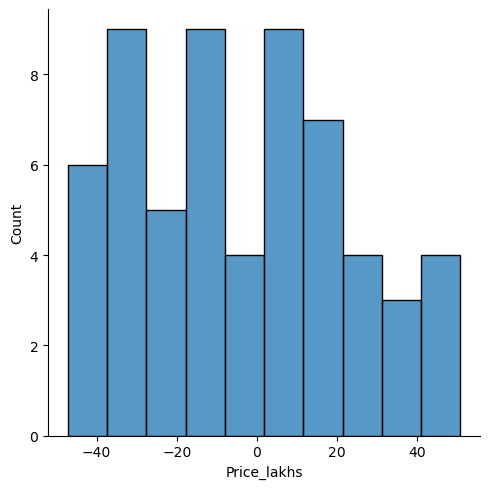

In [124]:
#TO VISUALIZE DIFFERENCE 
sns.displot(y_pred-y_test,bins=10)